# Creating a Classification Model

Source CSVs: https://github.com/ngjiawaie/Otto-Group-Product-Classification-Challenge

Using database from [Kaggle](https://www.kaggle.com/) in [Otto Group Product Classification Challenge](https://www.kaggle.com/competitions/otto-group-product-classification-challenge/data)

## Description

> - Each row corresponds to a single product. 
- There are a total of 93 numerical features, which represent counts of different events. 
- All features have been obfuscated and will not be defined any further.

> - There are **9 categories** for all products. 
- Each target category represents one of our most important product categories (like fashion, electronics, etc.). 
- The products for the training and testing sets are selected randomly.

### File descriptions
- **trainData.csv:** the training set
- **testData.csv:** the test set

### Data fields
- id - an anonymous id unique to a product
- feat_1, feat_2, ..., feat_93 - the various features of a product
- target - the class of a product


OBS: In this work, I used just the `train.csv` as my main dataset, a splitted him into train/test dataset.

# Import datasets

In [6]:
import pandas as pd

df_train = pd.read_csv('train.csv')
df_train

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61873,61874,1,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,2,0,Class_9
61874,61875,4,0,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,1,0,Class_9
61875,61876,0,0,0,0,0,0,0,3,1,...,0,3,1,0,0,0,0,0,0,Class_9
61876,61877,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,3,10,0,Class_9


In [7]:
df_train = df_train.drop(columns=['id'])

print(f"df_train\n", df_train.columns)

df_train
 Index(['feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 'feat_6', 'feat_7',
       'feat_8', 'feat_9', 'feat_10', 'feat_11', 'feat_12', 'feat_13',
       'feat_14', 'feat_15', 'feat_16', 'feat_17', 'feat_18', 'feat_19',
       'feat_20', 'feat_21', 'feat_22', 'feat_23', 'feat_24', 'feat_25',
       'feat_26', 'feat_27', 'feat_28', 'feat_29', 'feat_30', 'feat_31',
       'feat_32', 'feat_33', 'feat_34', 'feat_35', 'feat_36', 'feat_37',
       'feat_38', 'feat_39', 'feat_40', 'feat_41', 'feat_42', 'feat_43',
       'feat_44', 'feat_45', 'feat_46', 'feat_47', 'feat_48', 'feat_49',
       'feat_50', 'feat_51', 'feat_52', 'feat_53', 'feat_54', 'feat_55',
       'feat_56', 'feat_57', 'feat_58', 'feat_59', 'feat_60', 'feat_61',
       'feat_62', 'feat_63', 'feat_64', 'feat_65', 'feat_66', 'feat_67',
       'feat_68', 'feat_69', 'feat_70', 'feat_71', 'feat_72', 'feat_73',
       'feat_74', 'feat_75', 'feat_76', 'feat_77', 'feat_78', 'feat_79',
       'feat_80', 'feat_81', 'feat_82',

In [8]:
df_train.describe()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,0.263906,...,0.070752,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135
std,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,1.083340,...,1.151460,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,61.00000,51.000000,64.000000,70.000000,19.000000,10.000000,38.000000,76.000000,43.000000,30.000000,...,76.000000,55.000000,65.000000,67.000000,30.000000,61.000000,130.000000,52.000000,19.000000,87.000000


## Split train test

In [9]:
"""
  As said: I'm using the train.csv as my main dataset, and splitting it into train/test dataset.
"""

from sklearn.model_selection import train_test_split

X = df_train.drop(columns=['target'])
y = df_train['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

## Verify balance of classes

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


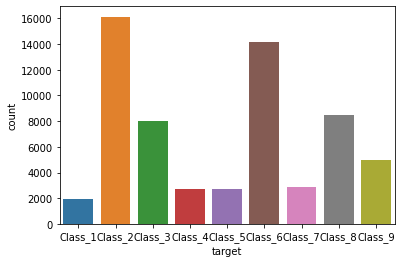

In [10]:
import seaborn as sns
sns.countplot(y);

#### Random Over Simpling

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


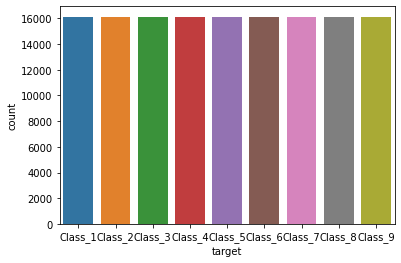

In [11]:
# Using RandomOverSampler to balance the dataset
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state = 32)
X_ros, y_ros = ros.fit_resample(X, y)

# plot new class distribution
sns.countplot(y_ros);

## Classification

### RandomForest + RandomOverSampling [BEST MODEL]

In [12]:
# Split train/test 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.25, random_state=42)


# Train and test model using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

model_rand_tree_ros = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
model_rand_tree_ros.fit(X_train,y_train)

y_pred = model_rand_tree_ros.predict(X_test)


# Report
from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))

Classification Report:
               precision    recall  f1-score   support

     Class_1     0.9879    0.9992    0.9935      3992
     Class_2     0.8868    0.8074    0.8452      3987
     Class_3     0.8452    0.8946    0.8692      3956
     Class_4     0.9745    0.9978    0.9860      4057
     Class_5     0.9976    1.0000    0.9988      4076
     Class_6     0.9866    0.9454    0.9656      4141
     Class_7     0.9706    0.9978    0.9840      4006
     Class_8     0.9787    0.9722    0.9754      4064
     Class_9     0.9778    0.9927    0.9852      3996

    accuracy                         0.9566     36275
   macro avg     0.9562    0.9563    0.9559     36275
weighted avg     0.9566    0.9566    0.9562     36275



## Export model

In [14]:
import pickle

model_    = model_rand_tree_ros
file_name = 'productcategory_randtree_ros' + '.pkl'

with open(file_name, 'wb') as file:
    pickle.dump(model_, file)

from google.colab import files
files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>